In [ ]:
!pip install corextopic
!pip install joblib

In [ ]:
import numpy as np
import scipy.sparse as ss
import matplotlib.pyplot as plt
import pandas as pd

from corextopic import corextopic as ct
from corextopic import vis_topic as vt
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [ ]:
df=pd.read_csv('all_tickets.csv')

In [ ]:
df.head()
df.shape

(48549, 9)

In [ ]:
#Converting the DF to list to feed to the CorEx Model
dfToList = df['body'].tolist()

dfList = list(df['body'])

dfValues = df['body'].values
#print(dfList)
print(dfValues)

['hi since recruiter lead permission approve requisitions makes please make thanks recruiter'
 'icon dear please setup icon per icon engineers please let other details needed thanks lead'
 'work experience user hi work experience student coming next his name much appreciate him duration thank'
 ...
 'sent tuesday july connection issues hello have connection issues while working client side link connection type cable en using applications excel word explorer very slow with delays while moving mouse or clicking constant problem but today slower than usual impacting our work same for colleagues working problem have previously reported please advise thank you senior analyst ext'
 'sent tuesday july error hello guys have received error when was trying export some reports status cube reports cannot be run without web components installed for your browser learn more about installing contact technical please help possible because we need process overtime hours booked buy our colleagues thanks 

In [ ]:
# Transform data into a sparse matrix
vectorizer = CountVectorizer(stop_words='english', max_features=20000,binary = True)
doc_word = vectorizer.fit_transform(df['body'].values.astype('U')) #Learn the vocabulary dictionary and return term-document matrix.
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words

(48549, 12009)

In [ ]:
# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names_out()))

In [ ]:
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words

(48549, 12009)

In [ ]:
# Train the CorEx topic model with 10 topics
topic_model = ct.Corex(n_hidden=10, words=words, max_iter=200, verbose=False, seed=1)
topic_model.fit(doc_word, words=words);

In [ ]:
# Print a single topic from CorEx topic model.
topic_model.get_topics(topic=7, n_words=10)

[('si', 0.11369693018604932, 1.0),
 ('la', 0.10599309242742495, 1.0),
 ('ca', 0.07957319028375683, 1.0),
 ('va', 0.06872577759730711, 1.0),
 ('care', 0.060923299942329985, 1.0),
 ('broad', 0.06030112191590887, 1.0),
 ('street', 0.058112006370770734, 1.0),
 ('subsidiaries', 0.04926887541863092, 1.0),
 ('se', 0.04887499062968618, 1.0),
 ('kingdom', 0.04848245913497929, 1.0)]

In [ ]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: sent,pm,manager,en,monday,access,need,issue,know,ticket
1: confidential,intended,privileged,action,solely,legally,delete,opinions,recipient,addressee
2: information,details,description,note,number,reference,summary,msg,ref,location
3: date,leave,days,submitted,process,required,possible,make,submit,update
4: purchase,purchased,po,administrator,ordered,receipts,consideration,item,mandatory,receive
5: regards,analyst,ext,hub,hello,kind,let,advised,best,assistance
6: high,importance,client,hi,working,files,today,file,updates,going
7: si,la,ca,va,care,broad,street,subsidiaries,se,kingdom
8: meeting,site,share,links,sites,want,manage,comment,making,decision
9: phone,mobile,subscription,visual,studio,license,extension,devices,perform,install


In [ ]:
topic_model.get_topics(topic=5, n_words=10, print_words=False)

[(8675, 0.11924906589334519, 1.0),
 (417, 0.10659076078267377, 1.0),
 (3979, 0.10209727856696846, 1.0),
 (5086, 0.1014653288386046, 1.0),
 (4932, 0.0811175803779021, 1.0),
 (5818, 0.0809002453725152, 1.0),
 (5995, 0.07803932369401553, 1.0),
 (229, 0.0710480892458614, 1.0),
 (1020, 0.06610922080684947, 1.0),
 (669, 0.03987389856370078, 1.0)]

In [ ]:
print(topic_model.clusters)
print(topic_model.clusters.shape) # m_words

[0 1 3 ... 3 3 4]
(12009,)


In [ ]:
# Print a single topic from CorEx topic model
topic_model.get_top_docs(topic=7, n_docs=10, sort_by='log_prob')

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


[(32552, 0.0),
 (13088, 0.0),
 (8479, 0.0),
 (33765, 0.0),
 (33768, 0.0),
 (33771, 0.0),
 (33778, 0.0),
 (33779, 0.0),
 (13081, 0.0),
 (8460, 0.0)]

In [ ]:
print(topic_model.p_y_given_x.shape) # n_docs x k_topics

(48549, 10)


In [ ]:
print(topic_model.labels.shape) # n_docs x k_topics

(48549, 10)


In [ ]:
#Total correlation is the measure which CorEx maximize when constructing the topic model. It can be accessed through tc and is reported in nats.
topic_model.tc

11.924952560239396

In [ ]:
topic_model.tcs.shape # k_topics

(10,)

In [ ]:
print(np.sum(topic_model.tcs))
print(topic_model.tc)

11.924952560239396
11.924952560239396


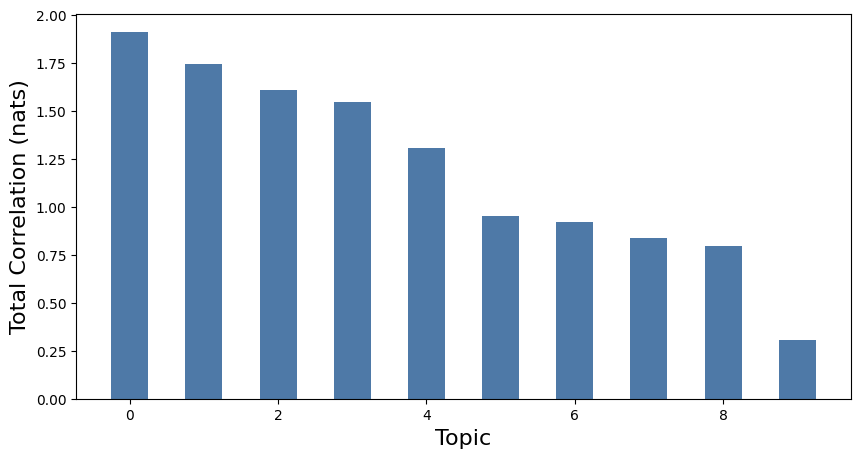

In [ ]:
#Selecting number of topics:Choosing from the data visualised
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);
plt.savefig('Distribution of TCs for each topic', dpi=600)

In [ ]:
topic_model.log_z.shape # n_docs x k_topics

(48549, 10)

In [ ]:
print(np.mean(topic_model.log_z, axis=0)) #The pointwise total correlations in log_z represent the correlations within an individual document explained by a particular topic. These correlations have been used to measure how "surprising" documents are with respect to given topics
print(topic_model.tcs)

[1.90977506 1.7438116  1.60944648 1.54592715 1.30375996 0.95374558
 0.92179684 0.83629986 0.79575134 0.30463868]
[1.90977506 1.7438116  1.60944648 1.54592715 1.30375996 0.95374558
 0.92179684 0.83629986 0.79575134 0.30463868]


In [ ]:
# Train a second layer to the topic model
tm_layer2 = ct.Corex(n_hidden=10)
tm_layer2.fit(topic_model.labels);

# Train a third layer to the topic model
tm_layer3 = ct.Corex(n_hidden=1)
tm_layer3.fit(tm_layer2.labels);

In [ ]:
vt.vis_hierarchy([topic_model, tm_layer2, tm_layer3], column_label=words, max_edges=200, prefix='topic-model-example')

weight threshold is 0.000000 for graph with max of 110.000000 edges 


In [ ]:
!pip install tqdm

In [ ]:
## defining all utilty functions - needed for Data cleaning and processing

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk

# Contraction map
c_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you you will",
    "you'll've": "you you will have",
    "you're": "you are",
    "you've": "you have"
}

# Compiling the contraction dict
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))

# List of stop words
add_stop = ['said', 'say', '...', 'like', 'cnn', 'ad']
stop_words = ENGLISH_STOP_WORDS.union(add_stop)

# List of punctuation
punc = list(set(string.punctuation))


# Splits words on white spaces (leaves contractions intact) and splits out
# trailing punctuation
def casual_tokenizer(text):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens


def expandContractions(text, c_re=c_re):
    def replace(match):
        return c_dict[match.group(0)]
    return c_re.sub(replace, text)


def process_text(text):
    text = casual_tokenizer(text)
    text = [each.lower() for each in text]
    text = [re.sub('[0-9]+', '', each) for each in text]
    text = [expandContractions(each, c_re=c_re) for each in text]
    text = [SnowballStemmer('english').stem(each) for each in text]
    text = [w for w in text if w not in punc]
    text = [w for w in text if w not in stop_words]
    text = [each for each in text if len(each) > 1]
    text = [each for each in text if ' ' not in each]
    return text


def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]


def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)


def whitespace_tokenizer(text):
    pattern = r"(?u)\b\w\w+\b"
    tokenizer_regex = RegexpTokenizer(pattern)
    tokens = tokenizer_regex.tokenize(text)
    return tokens


# Funtion to remove duplicate words
def unique_words(text):
    ulist = []
    [ulist.append(x) for x in text if x not in ulist]
    return ulist


def word_count(text):
    return len(str(text).split(' '))

In [ ]:
# Get the word count
df['word_count'] = df['body'].apply(word_count)
df['word_count'].mean()

39.662814888051244

In [ ]:
# Process the text
df['processed_text'] = df['body'].apply(process_text)
df.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,word_count,processed_text
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4,12,"[hi, sinc, recruit, lead, permiss, approv, req..."
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4,15,"[icon, dear, pleas, setup, icon, icon, engin, ..."
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4,16,"[work, experi, user, hi, work, experi, student..."
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4,11,"[request, meet, hi, pleas, help, follow, equip..."
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4,140,"[expir, day, hi, ask, help, updat, password, c..."


In [ ]:
!pip install tqdm
!pip install stylegan2_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.7/705.7 kB 30.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.7 MB/s eta 0:00

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim import corpora
from tqdm import tqdm as tqdm

# Use Gensim's CorEX to get the best num of topics via coherence score
texts = df['processed_text']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Creating corpus using dictionary prepared above
corpus = [dictionary.doc2bow(doc) for doc in tqdm(texts)]

# Get top words for each topic from the trained corex model
topics = topic_model.get_topics(n_words=100)
corex_topic_words = [[word for word, tc,_ in topic] for topic in topics]

100%|██████████| 48549/48549 [00:01<00:00, 30500.69it/s]


In [ ]:
topics

[[('sent', 0.4172771986245654, 1.0),
  ('pm', 0.21310386254502592, -1.0),
  ('manager', 0.11207229979106687, 1.0),
  ('en', 0.10120170321120038, 1.0),
  ('monday', 0.09726099507210792, 1.0),
  ('access', 0.09099885108386405, 1.0),
  ('need', 0.07511037119978554, 1.0),
  ('issue', 0.06767468106643271, 1.0),
  ('know', 0.06548086514363143, 1.0),
  ('ticket', 0.06442926535440315, 1.0),
  ('message', 0.06337460076988531, 1.0),
  ('following', 0.06328480480987234, 1.0),
  ('error', 0.06204724439894795, 1.0),
  ('check', 0.054011517738654, 1.0),
  ('trying', 0.052583606658231564, 1.0),
  ('able', 0.05101179849336241, 1.0),
  ('open', 0.04385856652258272, 1.0),
  ('request', 0.04184471148080464, 1.0),
  ('try', 0.041030426899017786, 1.0),
  ('week', 0.03987993986367086, 1.0),
  ('contact', 0.03969622151357746, 1.0),
  ('th', 0.038764177110506795, 1.0),
  ('look', 0.038677769571405576, 1.0),
  ('using', 0.03825467461776648, 1.0),
  ('approval', 0.03586791562321203, 1.0),
  ('problem', 0.034628

In [ ]:
# Get coherence score
c_v_cm_corex = CoherenceModel(topics=corex_topic_words, texts=texts, corpus=corpus, dictionary=dictionary, coherence='c_v')
c_v_cm_corex.get_coherence()

0.44277923134354824

In [ ]:
# Get coherence score
u_mass_cm_corex = CoherenceModel(topics=corex_topic_words, texts=texts, corpus=corpus, dictionary=dictionary, coherence='u_mass')
u_mass_cm_corex.get_coherence()

-4.335385217665007

In [ ]:
# Get coherence score
c_uci_cm_corex = CoherenceModel(topics=corex_topic_words, texts=texts, corpus=corpus, dictionary=dictionary, coherence='c_uci')
c_uci_cm_corex.get_coherence()

-2.029696947662671

In [ ]:
# Get coherence score
c_npmi_cm_corex = CoherenceModel(topics=corex_topic_words, texts=texts, corpus=corpus, dictionary=dictionary, coherence='c_npmi')
c_npmi_cm_corex.get_coherence()

-0.031675891913764485